## Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data

In [29]:
df = pd.read_csv("data/salary_data_cleaned.csv")

In [30]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,agile_yn,numpy_yn,excel_yn,aws_yn,pandas_yn,ml_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,1,0,0,1,data scientist,na,2536,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,1,data scientist,na,4783,1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,1,0,0,1,data scientist,na,3461,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,1,data scientist,na,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,1,0,0,1,data scientist,na,2728,3


In [31]:
# looking at Numeric Data Description
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,agile_yn,numpy_yn,excel_yn,aws_yn,pandas_yn,ml_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.172507,0.036388,0.522911,0.237197,0.057951,0.424528,3869.545822,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.378075,0.187380,0.499812,0.425651,0.233809,0.494605,1521.495868,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3731.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


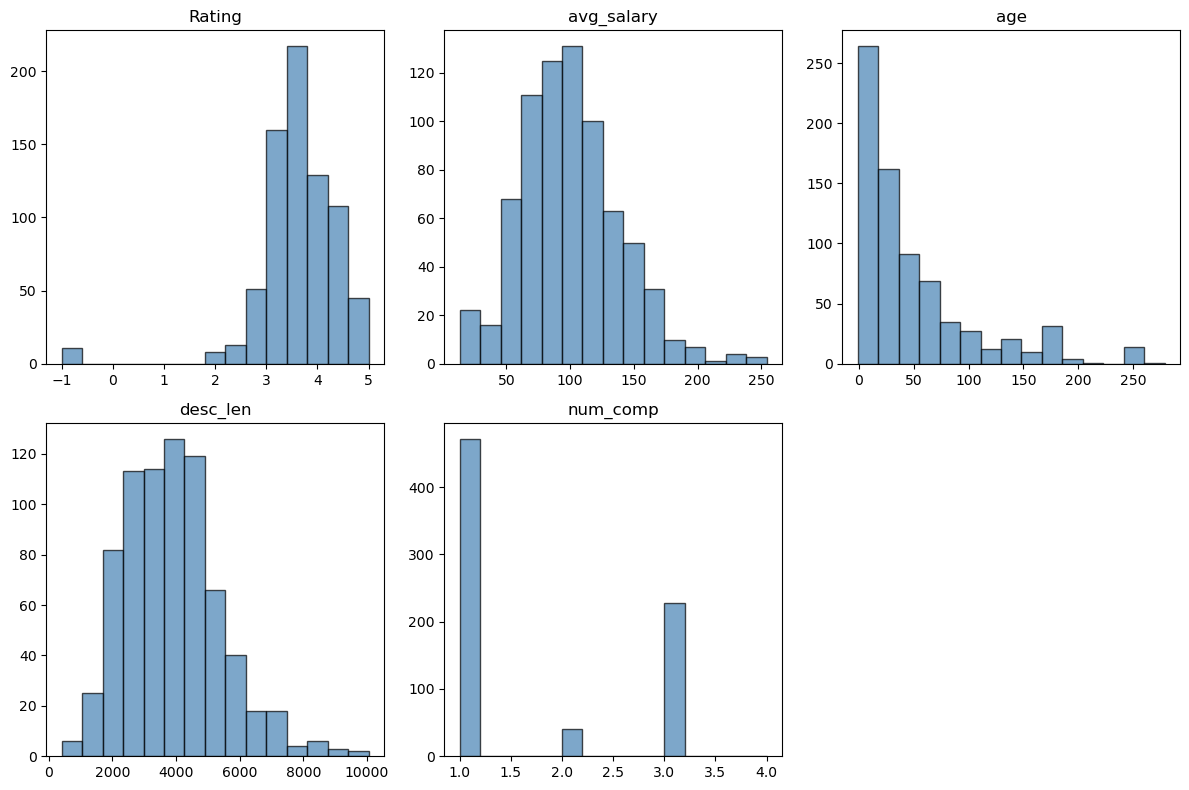

In [32]:
# Making Histogram For Numeric Data
columns = ["Rating", "avg_salary", "age","desc_len","num_comp"]
df[columns].hist(color='steelblue', edgecolor='black', alpha=0.7, bins=15, grid=False, layout=(2, 3), figsize=(12, 8))

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

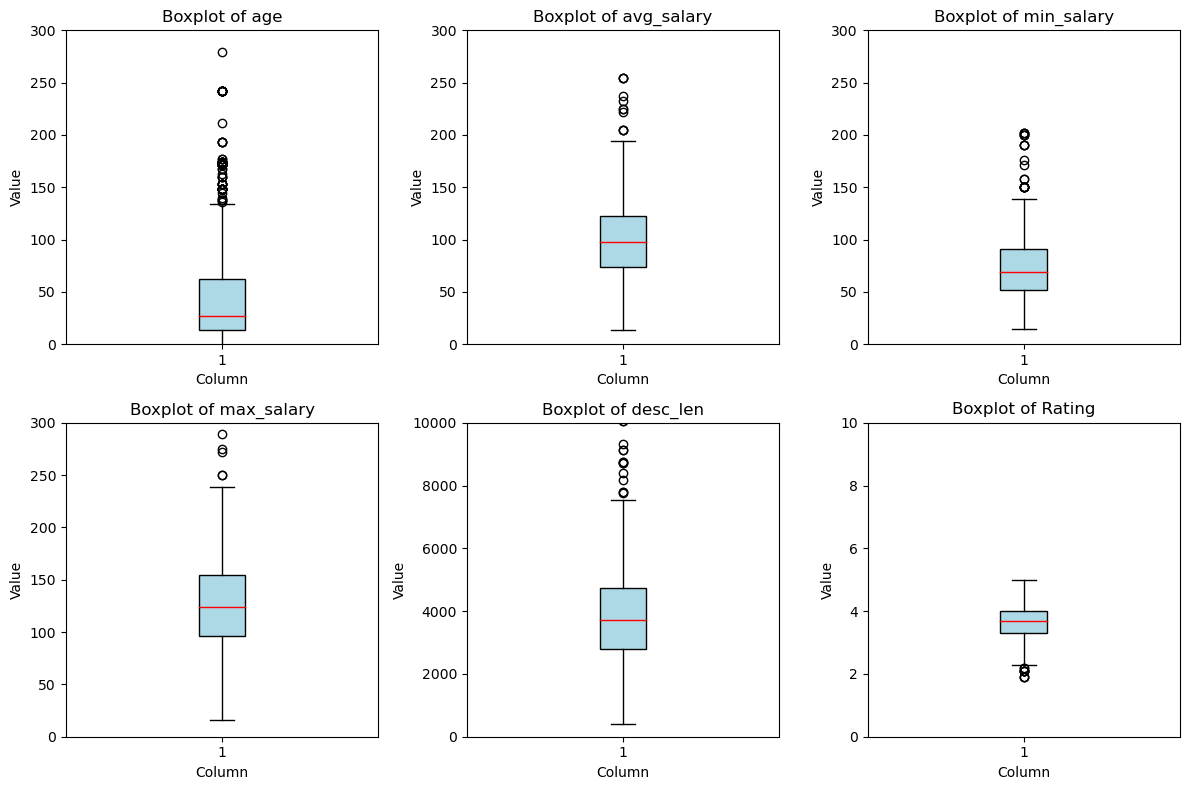

In [33]:
# Making Boxplot for Numeric Data
columns = ["age", "avg_salary","min_salary","max_salary", "desc_len", "Rating"]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, column in enumerate(columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    axes[row, col].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), whiskerprops=dict(color='black'), medianprops=dict(color='red'))
    axes[row, col].set_title(f"Boxplot of {column}")
    axes[row, col].set_xlabel("Column")
    axes[row, col].set_ylabel("Value")

    if column == "desc_len":
        axes[row, col].set_ylim([0, 10000])  # Adjust the range according to your desired values
    elif column == "Rating":
        axes[row, col].set_ylim([0, 10])
    else:
        axes[row, col].set_ylim([0, 300])   # Adjust the range according to your desired values

plt.tight_layout()
plt.show()

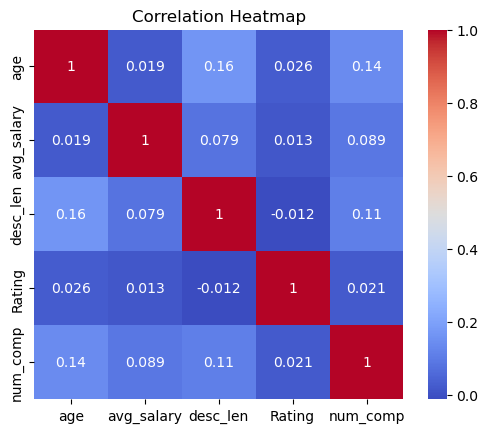

In [34]:
# Making Heatmap for Numeric Data
columns = ["age", "avg_salary","desc_len", "Rating","num_comp"]

# Create a correlation matrix
correlation_matrix = df[columns].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn', 'ml_yn',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [36]:
# Making a List of Categorial Data
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company_text', 'job_state', 'same_state','python_yn',
       'agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn', 'ml_yn',
       'job_simp', 'seniority']]

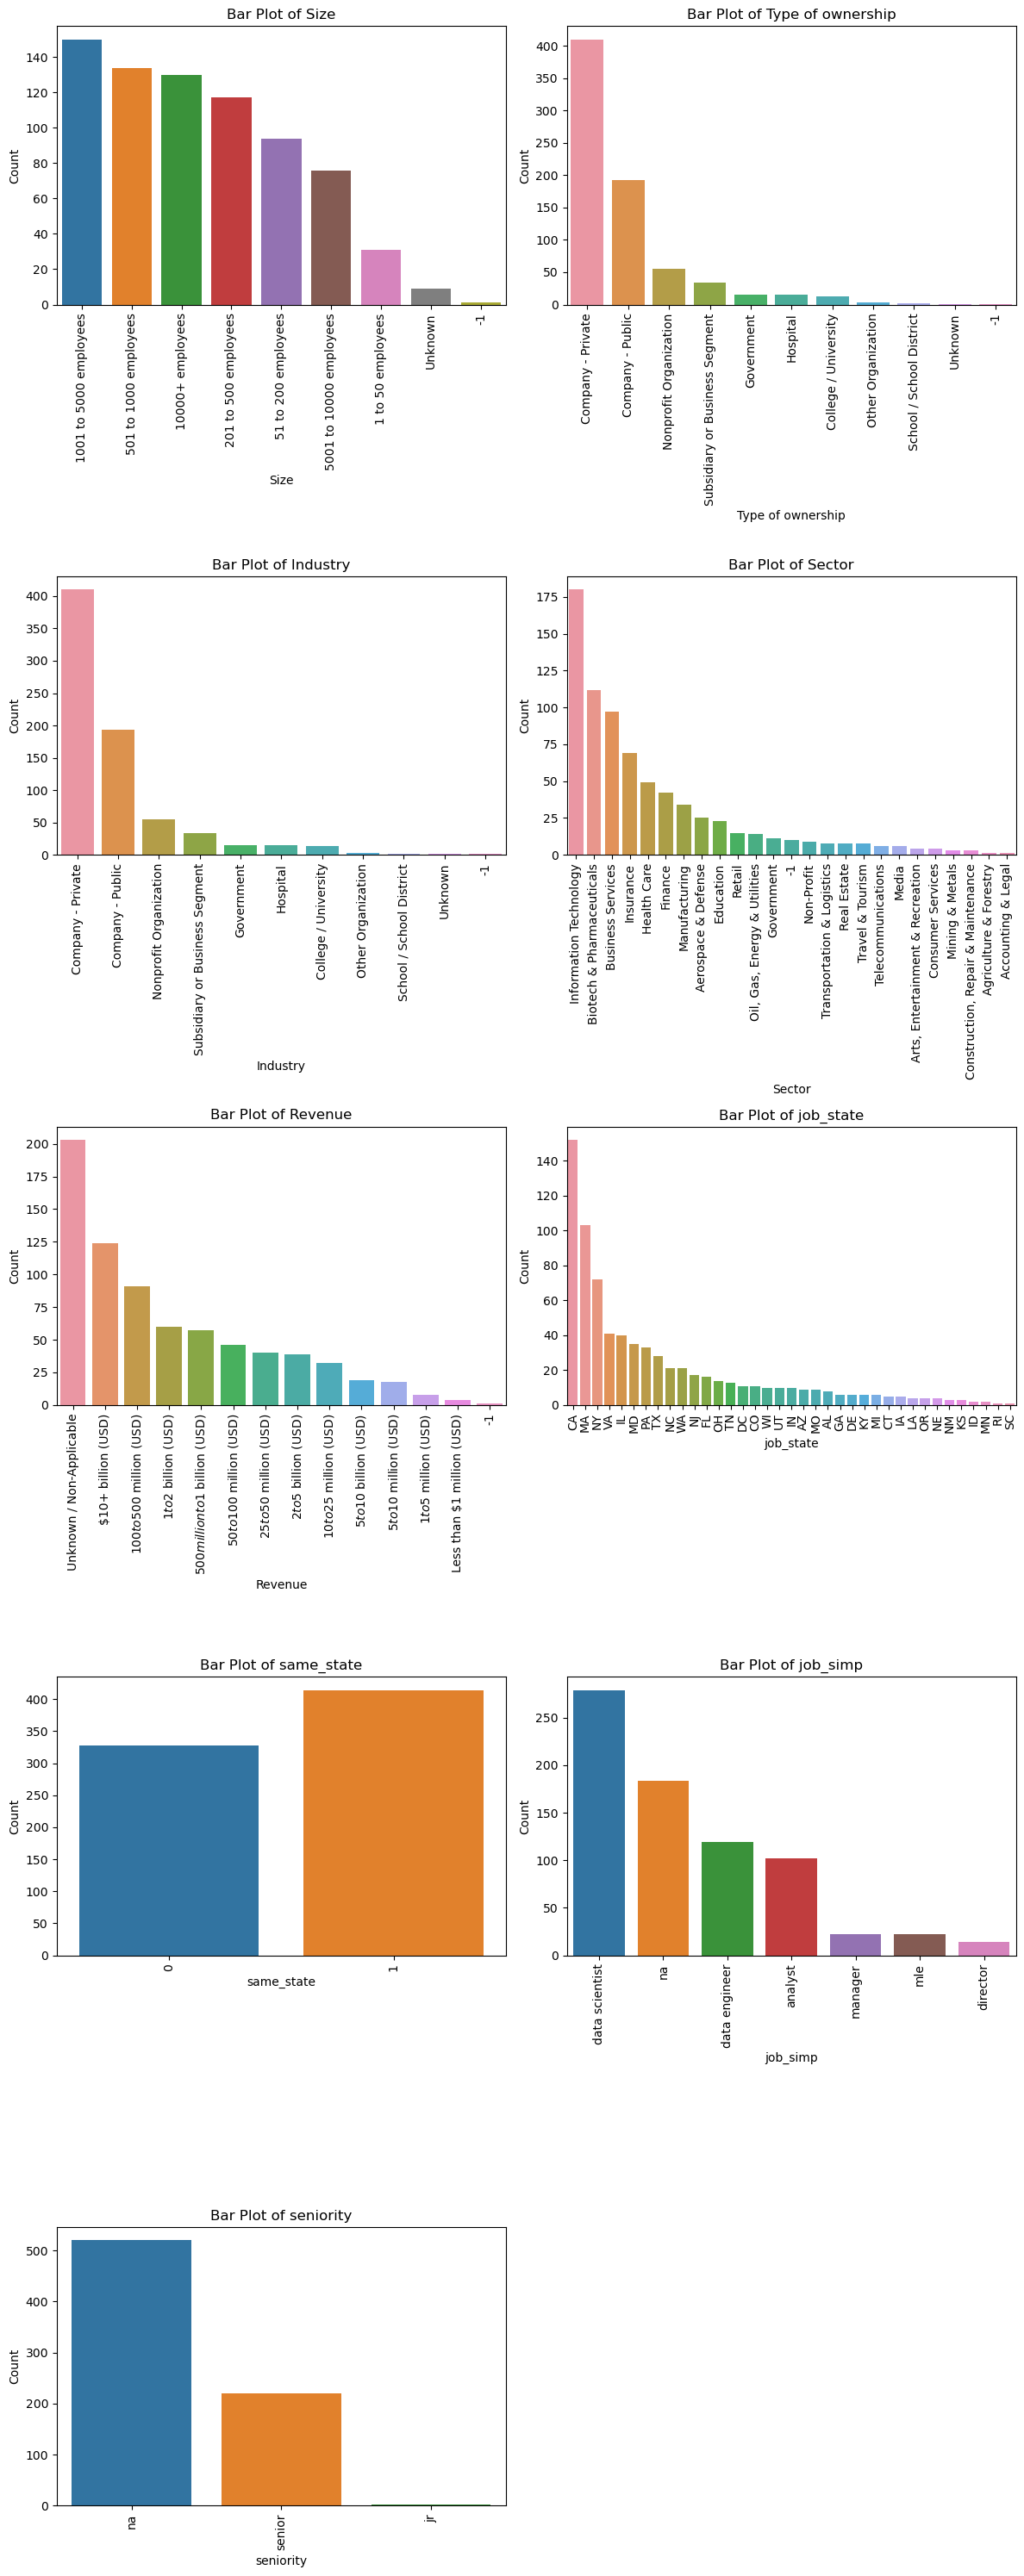

In [48]:
# Creating Bar Plots for Categrial Data
import math

columns = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'job_simp', 'seniority']
num_columns = len(columns)
num_rows = math.ceil(num_columns / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 6))  # Adjust the figure size

for i, column in enumerate(columns):
    row = i // 2  # Calculate the row index
    col = i % 2  # Calculate the column index
    
    if column in df_cat:
        if column == 'Industry':
            sns.barplot(x=cat_counts.index, y=cat_counts, ax=axes[row, col])  # Use axes[row, col]
            axes[row, col].set_title(f"Bar Plot of {column}")
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel("Count")
            axes[row, col].tick_params(axis='x', rotation=90)
        else:
            cat_counts = df_cat[column].value_counts()
            sns.barplot(x=cat_counts.index, y=cat_counts, ax=axes[row, col])  # Use axes[row, col]
            axes[row, col].set_title(f"Bar Plot of {column}")
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel("Count")
            axes[row, col].tick_params(axis='x', rotation=90)
    else:
        axes[row, col].axis('off')

# If the number of columns is odd, hide the last empty subplot
if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


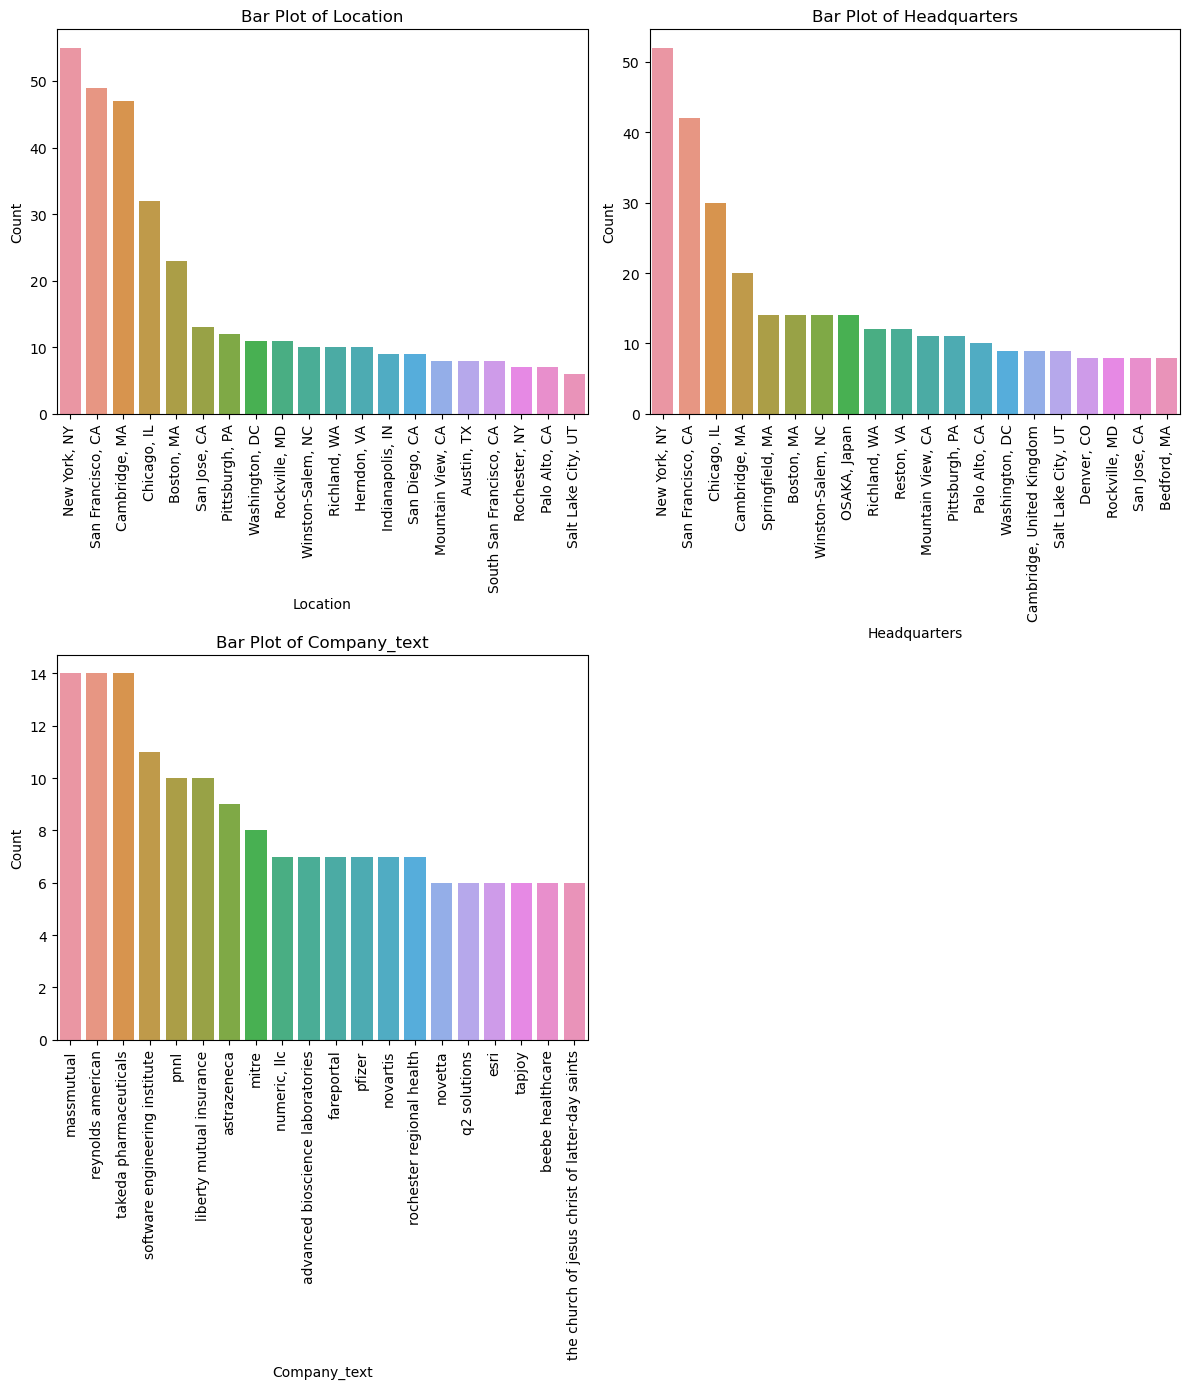

In [38]:
# Creating Bar Plots for 'Location', 'Headquarters', 'Company_text'
import math

columns = ['Location', 'Headquarters', 'Company_text']
num_columns = len(columns)
num_rows = math.ceil(num_columns / 2)

if num_rows == 1:
    fig, axes = plt.subplots(1, 2, figsize=(12, num_rows * 7))
else:
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 7))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    if column in df_cat:
        cat_counts = df_cat[column].value_counts().head(20)
        
        if num_rows == 1:
            sns.barplot(x=cat_counts.index, y=cat_counts, ax=axes[col])
            axes[col].set_title(f"Bar Plot of {column}")
            axes[col].set_xlabel(column)
            axes[col].set_ylabel("Count")
            axes[col].tick_params(axis='x', rotation=90)
        else:
            sns.barplot(x=cat_counts.index, y=cat_counts, ax=axes[row, col])
            axes[row, col].set_title(f"Bar Plot of {column}")
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel("Count")
            axes[row, col].tick_params(axis='x', rotation=90)
    else:
        if num_rows == 1:
            axes[col].axis('off')
        else:
            axes[row, col].axis('off')

# Remove the empty subplot number 4
if num_columns % 2 != 0:
    if num_rows == 1:
        fig.delaxes(axes[1])
    else:
        fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()


In [39]:
# Pivot Table for "job_simp" and "seniority"
pivot_table_simp_sin = df.pivot_table(index=['job_simp', 'seniority'], values='avg_salary')
pivot_table_simp_sin

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

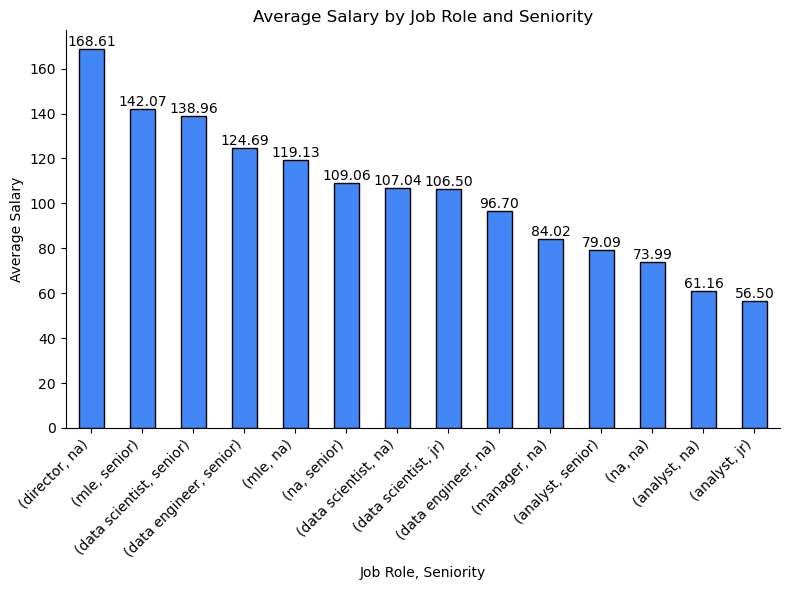

In [40]:
#creating a Bar Chart for pivot_table_simp_sin
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the pivot table by average salary in descending order
pivot_table = pivot_table_simp_sin.sort_values('avg_salary', ascending=False)

# Plotting the bar chart with custom colors and edgecolor
pivot_table.plot(kind='bar', ax=ax, color=['#4287f5', '#6bb3e8'], edgecolor='black')

# Customizing the chart
ax.set_title('Average Salary by Job Role and Seniority')
ax.set_xlabel('Job Role, Seniority')
ax.set_ylabel('Average Salary')
ax.legend().set_visible(False)  # Hide the legend

# Rotating and aligning the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Removing the spines (borders) of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [45]:
# Making some adjusment on displaying rows
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

In [46]:
# Pivot Table for "job_state" and "job_simp"
pivot_table_state_simp = df.pivot_table(index=['job_state', 'job_simp'], values='avg_salary')
pivot_table_state_simp

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        analyst          85.250000
          data engineer   129.540000
          data scientist  142.522059
          manager          80.611111
          mle             177.300000
          na               99.907407
CO        analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          mle             100.500000
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        analyst          47.500000
          data engineer    91.833333
          data scientist   97.357143
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        analyst          66.500000
          data engineer    96.125000
          data scientist  117.233333
          director        221.750000
          mle             133.000000
          na               57.166667
IN        data engineer   114.500000
          data scientist   84.500000
          na               69.000000
KS        mle              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        analyst          59.125000
          data engineer   107.291667
          data scientist  113.750000
          director        117.833333
          manager          71.900000
          na              107.478261
MD        analyst          80.666667
          data engineer   109.000000
          data scientist  109.115385
          na               88.750000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        analyst          83.583333
          data engineer   112.000000
          data scientist  106.875000
          director        161.500000
          manager         109.500000
          na               82.500000
NM        data scientist   74.333333
NY        analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          mle             125.000000
          na               81.583333
OH        analyst          53.875000
          data scientist  105.285714
          na               91.166667
OR        data engineer    73.000000
          data scientist   98.500000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          mle             120.500000
          na               76.062500
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data engineer   113.062500
          data scientist  100.730769
          na               41.285714
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          mle              87.

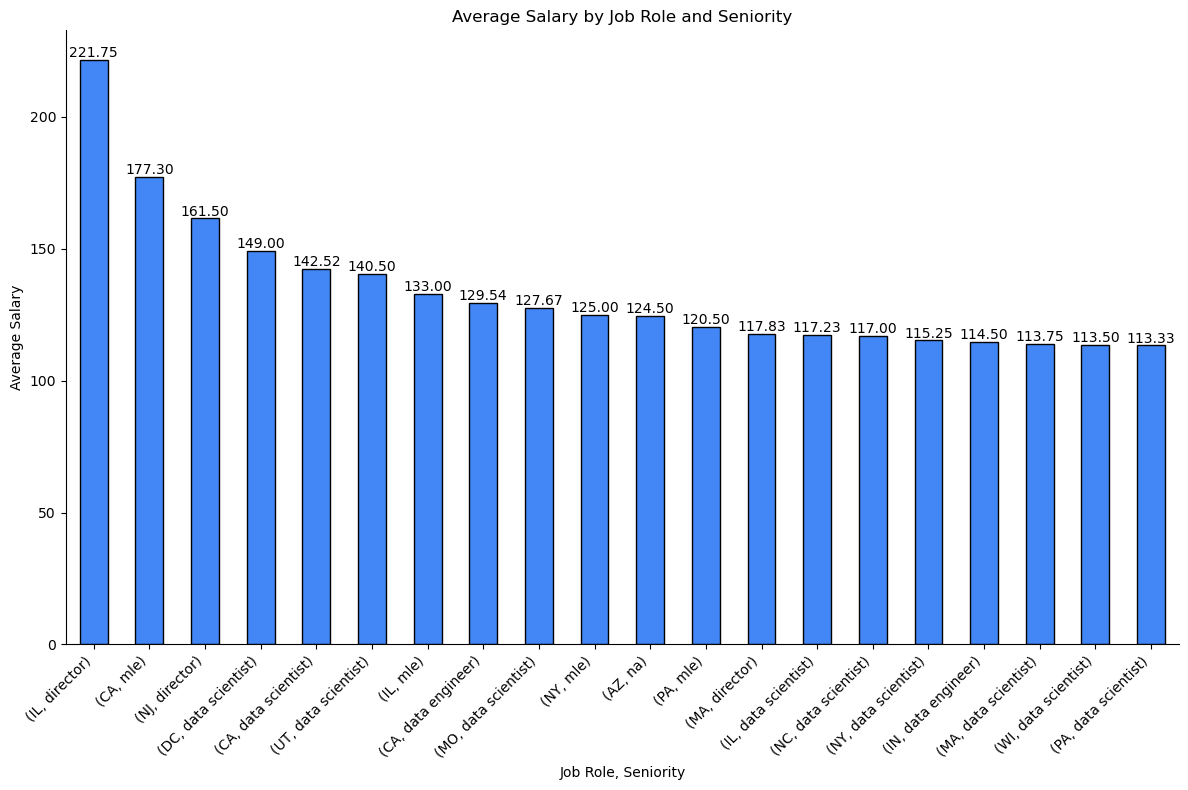

In [42]:
# Creating a Bar Chart for pivot_table_state_simp
fig, ax = plt.subplots(figsize=(12, 8))

# Sort the pivot table by average salary in descending order
pivot_table = pivot_table_state_simp.sort_values('avg_salary', ascending=False)

# Selecting the first 20 data points
pivot_table = pivot_table.head(20)

# Plotting the bar chart with custom colors and edgecolor
pivot_table.plot(kind='bar', ax=ax, color=['#4287f5', '#6bb3e8'], edgecolor='black')

# Customizing the chart
ax.set_title('Average Salary by Job Role and Seniority')
ax.set_xlabel('Job Role, Seniority')
ax.set_ylabel('Average Salary')
ax.legend().set_visible(False)  # Hide the legend

# Rotating and aligning the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Removing the spines (borders) of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [43]:
# Create a new DataFrame with only the 'avg_salary' column
df_avg_salary = df[['avg_salary']]

# Concatenate the categorical columns DataFrame with the 'avg_salary' DataFrame
df_combined = pd.concat([df_cat, df_avg_salary], axis=1)

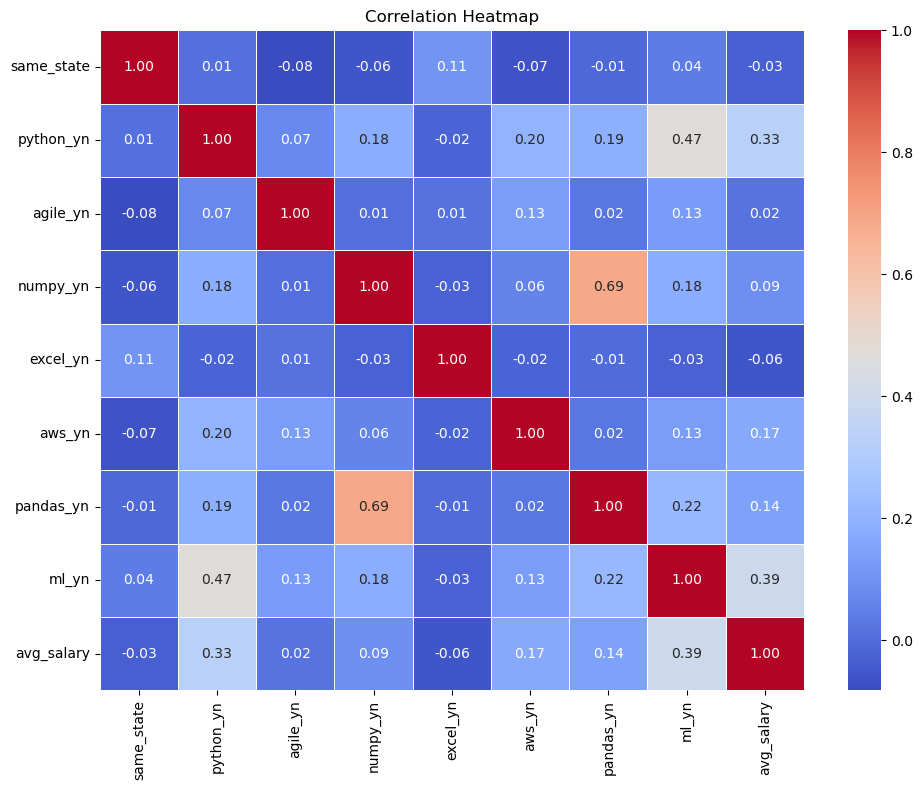

In [44]:
# Creating a Correlational Heatmap

# Select only the numeric columns for correlation calculation
numeric_columns = df_combined.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Customize the plot
ax.set_title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn', 'ml_yn',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [52]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided', 'python_yn',
       'agile_yn', 'numpy_yn', 'excel_yn', 'aws_yn', 'pandas_yn', 'ml_yn','desc_len','Type of ownership',"avg_salary"]]

In [59]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        pivot_table = df_pivots.pivot_table(index=i, values='avg_salary', aggfunc='mean')
        print(pivot_table.sort_values('avg_salary', ascending=False))
        print()

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services           

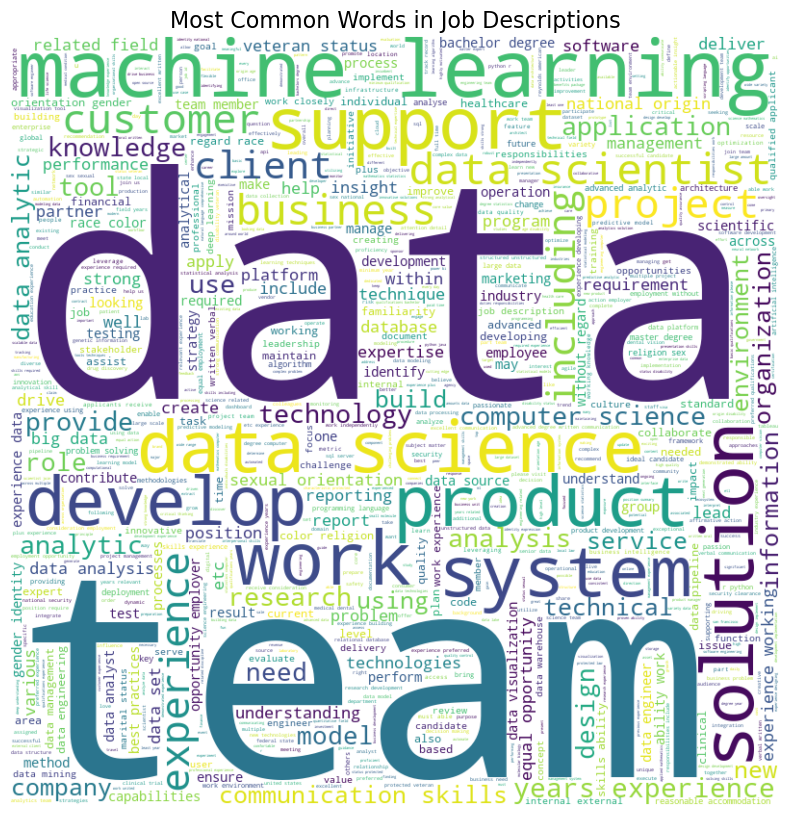

In [69]:
words = " ".join(df["Job Description"])

# Function to filter out punctuation and stop words
def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

# Apply filtering to the combined job descriptions
word_filtered = punctuation_stop(words)
text = " ".join([ele for ele in word_filtered])

# Generate word cloud
wc = WordCloud(background_color="white", random_state=1, stopwords=stopwords.words("english"),
               max_words=2000, width=800, height=800)
wc.generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Job Descriptions", fontsize=16)
plt.show()